In [120]:
# A code-along to get to grips with Keras at a Bath ML meetup on June 3rd, 2018.

## Uses Keras to build a Convolutional NN to predict users from their walking accelorometer data.

In [121]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Conv1D, MaxPooling1D, Flatten

np.random.seed(2018)

In [122]:
# Loading walking data
walking = np.load("data/walking_data.npy")

In [123]:
def plot_series(series):
    plt.plot(series[:, 0], color="red")
    plt.plot(series[:, 1], color="green")
    plt.plot(series[:, 2], color="blue")

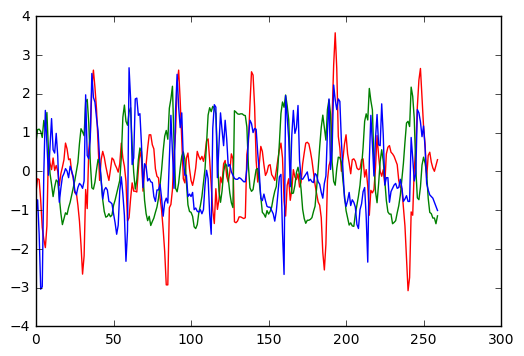

In [124]:
plot_series(walking[100, :, :])

In [125]:
# Load walking data
walking_labels = np.load("data/walking_labels.npy")

# Generate indices to take train, val and test data from
m = walking.shape[0]
indices = [x for x in range(m)]
np.random.shuffle(indices)
train_indices = indices[int(m*0.6):]
val_indices = indices[int(m*0.6):int(m*0.8)]
test_indices = indices[:int(m*0.8)]

# Split into input and labels based on the generated indices.
X_train = walking[train_indices,:,:]
X_val = walking[val_indices,:,:]
X_test = walking[test_indices,:,:]

y_train = to_categorical(walking_labels[train_indices])
y_val = to_categorical(walking_labels[val_indices])
y_test = to_categorical(walking_labels[test_indices])

In [126]:
model = Sequential()

model.add(Conv1D(filters=30, kernel_size=40, strides=4, activation="relu", input_shape=(260, 3)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=30, kernel_size=10, activation="relu"))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=30, kernel_size=4, activation="relu"))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(100, activation="sigmoid"))
model.add(Dense(15, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_33 (Conv1D)           (None, 56, 30)            3630      
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 28, 30)            0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 19, 30)            9030      
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 9, 30)             0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 6, 30)             3630      
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 3, 30)             0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 90)                0         
__________

In [127]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [128]:
result = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_val, y_val))

Train on 2717 samples, validate on 1358 samples
Epoch 1/50
2717/2717 [==============================] - 3s 1ms/step - loss: 2.6870 - acc: 0.1288 - val_loss: 2.4556 - val_acc: 0.2526
Epoch 2/50
2717/2717 [==============================] - 2s 561us/step - loss: 2.1333 - acc: 0.3600 - val_loss: 1.6838 - val_acc: 0.4433
Epoch 3/50
2717/2717 [==============================] - 2s 564us/step - loss: 1.4245 - acc: 0.5709 - val_loss: 1.1607 - val_acc: 0.6826
Epoch 4/50
2717/2717 [==============================] - 2s 553us/step - loss: 1.0697 - acc: 0.6986 - val_loss: 0.9119 - val_acc: 0.7585
Epoch 5/50
2717/2717 [==============================] - 1s 545us/step - loss: 0.8883 - acc: 0.7556 - val_loss: 0.7639 - val_acc: 0.7769
Epoch 6/50
2717/2717 [==============================] - 2s 565us/step - loss: 0.7386 - acc: 0.8016 - val_loss: 0.6612 - val_acc: 0.8211
Epoch 7/50
2717/2717 [==============================] - 1s 550us/step - loss: 0.6540 - acc: 0.8222 - val_loss: 0.5674 - val_acc: 0.8542
Ep

In [129]:
# Prediction and reporting
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(X_test)

In [130]:
print(classification_report(np.argmax(y_test, axis=1), y_pred))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       415
          1       0.92      0.95      0.94       345
          2       0.92      0.87      0.90       255
          3       0.95      0.94      0.95       453
          4       0.89      0.87      0.88       267
          5       0.98      0.96      0.97       448
          6       0.82      0.91      0.86       259
          7       0.85      0.90      0.87       341
          8       0.93      0.94      0.93       406
          9       0.95      0.93      0.94       357
         10       0.97      0.98      0.97       426
         11       0.89      0.87      0.88       332
         12       0.96      0.98      0.97       384
         13       0.96      0.94      0.95       330
         14       0.95      0.93      0.94       415

avg / total       0.93      0.93      0.93      5433



In [131]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

[[396   2   2   8   0   0   4   0   0   1   2   0   0   0   0]
 [  0 329   0   0   0   0   5   4   1   0   0   0   0   6   0]
 [  0   0 223   0  14   0   6   3   1   1   3   1   1   0   2]
 [  9   0   0 427   4   4   4   0   3   0   0   0   0   2   0]
 [  0   0  11   0 232   0   4   0   9   1   9   0   0   0   1]
 [  0   1   1   7   0 428   0   0   8   0   0   0   0   1   2]
 [  2   2   0   1   4   0 235   3   3   4   0   4   0   0   1]
 [  0   3   1   0   0   1   3 306   0   1   0  22   1   1   2]
 [  1   1   0   5   1   4   4   0 381   3   0   0   0   0   6]
 [  1   0   3   0   0   0   9   3   0 331   0   3   6   1   0]
 [  0   0   1   1   6   0   0   0   0   0 418   0   0   0   0]
 [  0   5   1   0   0   0   4  32   0   0   0 288   0   1   1]
 [  0   0   0   0   0   0   0   0   0   2   0   3 375   0   4]
 [  1  10   0   0   0   0   5   2   1   2   0   0   0 309   0]
 [  0   4   0   0   1   1   5   6   4   1   0   1   7   1 384]]


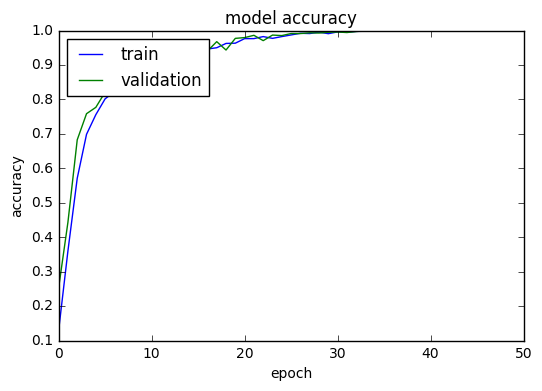

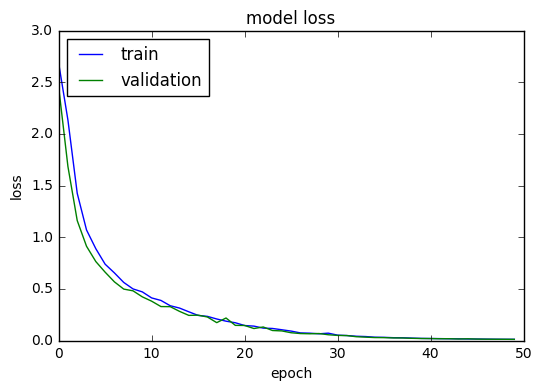

In [132]:
%matplotlib inline
#  "Accuracy"
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [133]:
def plot_filter(model, layer, k):
    weights = model.layers[layer].get_weights()[0][:, :, k]
    plot_series(weights)

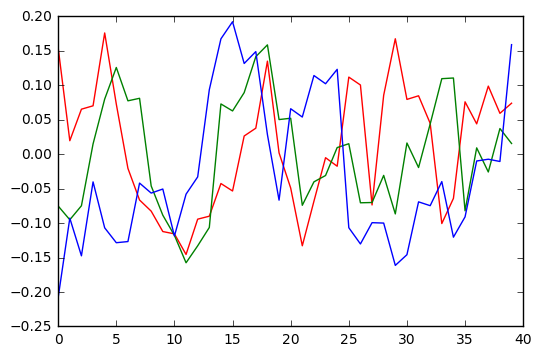

In [134]:
plot_filter(model, 0, 4)

In [135]:
def plot_filter_corr(model, layer, k):
    weights = model.layers[layer].get_weights()[0][:, :, k]
    corrs = np.apply_along_axis(lambda y: np.correlate(y, y, mode="full"), 0, weights)
    plot_series(corrs[corrs.shape[0]//2:, :])

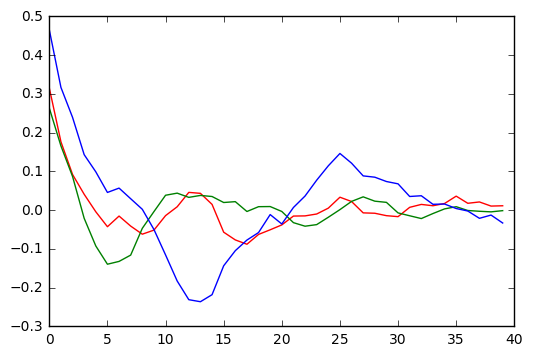

In [136]:
plot_filter_corr(model, 0, 4)